# 有名なモデルの実装

In [47]:
import time

import torch
from torch.utils.data import DataLoader, Subset
from torch.nn import functional as F
from torch import nn, optim
import torchvision
from torchvision import models, transforms
from torchvision.models.vgg import VGG11_Weights

%load_ext autoreload
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## LeNet

LeNet
- 当初とは異なるが、現代版としてReLU、MaxPoolingを使用
- nn.Conv2d, nn.Linear, F.max_pool2d, F.relu, nn.Flattenを使用してLeNetを実装する
- 基本的な畳み込み層のblockは、conv2d -> relu -> max poolingとする
- その後flattenをしてfc(fully connected) ->reluで全結合層を実装する

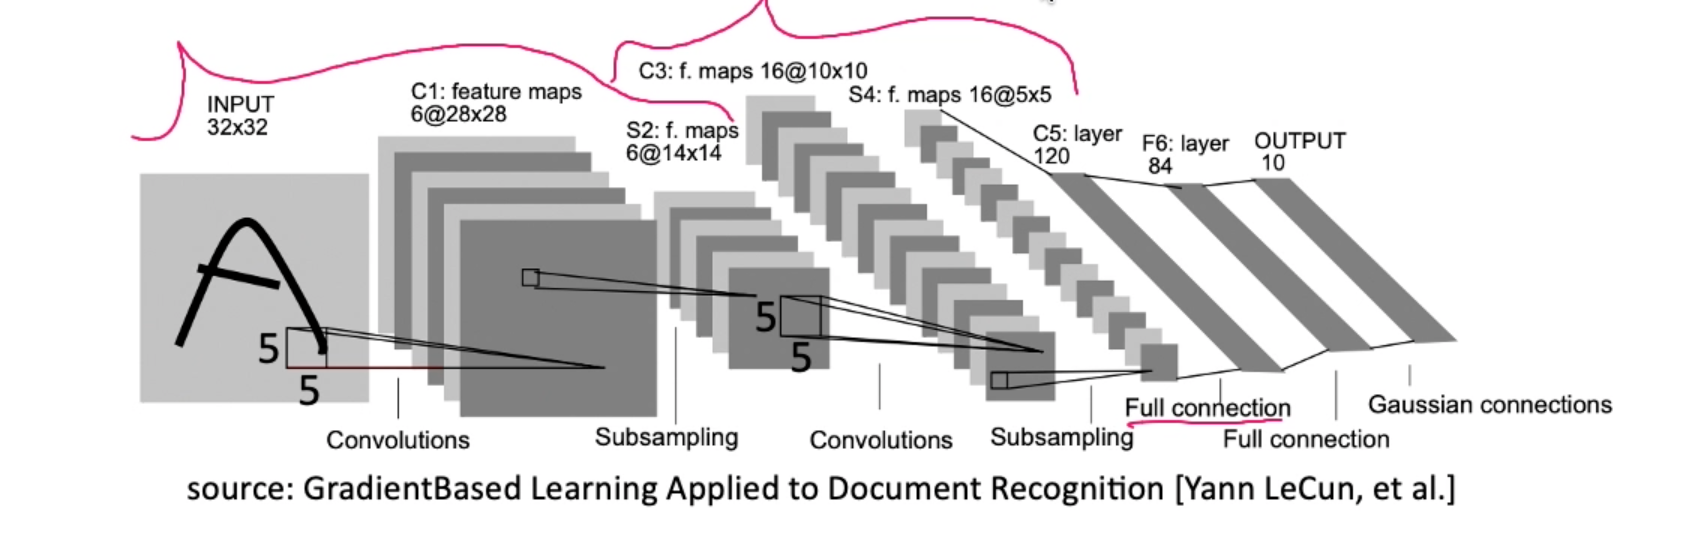

In [11]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # C1
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # C3
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16*5*5, 120)  # C5
        self.fc2 = nn.Linear(120, 84)  # F6
        self.fc3 = nn.Linear(84, 10)  # OUTPUT

    def forward(self, X):
        X = F.max_pool2d(F.relu(self.conv1(X)), 2)  # S2
        X = F.max_pool2d(F.relu(self.conv2(X)), 2)  # S4
        X = self.flatten(X)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [13]:
lenet = LeNet()
X = torch.randn((128, 1, 32, 32))
out = lenet(X)
print(X.shape, out.shape)

torch.Size([128, 1, 32, 32]) torch.Size([128, 10])


In [14]:
out

tensor([[ 0.0344, -0.0315, -0.1085,  ...,  0.1513, -0.0679, -0.0082],
        [ 0.0487,  0.0040, -0.0927,  ...,  0.1373, -0.0320, -0.0213],
        [ 0.0367, -0.0162, -0.0770,  ...,  0.1385, -0.0615, -0.0013],
        ...,
        [ 0.0378, -0.0290, -0.0924,  ...,  0.1481, -0.0711, -0.0088],
        [ 0.0579,  0.0013, -0.0940,  ...,  0.1334, -0.0432, -0.0147],
        [ 0.0259, -0.0333, -0.0992,  ...,  0.1217, -0.0566,  0.0084]],
       grad_fn=<AddmmBackward0>)

## Pytorchの既存のモデルを呼び出す

既存モデルの使用
- torchvision.modelsモジュールを使って既存のモデルを利用することが可能
- AlexNet, VGGをはじめ多くのモデルが存在する
    - https://pytorch.org/vision/0.16/models.html
    - 実際にはこのようにして依存のモデルを使うことが多い
- VGG16
    - from torchvision.models.vgg import VGG16_Weights
    - models.vgg16()
        - weights: VGG16_Weights.IMAGENET1K_V1を指定してImageNetでの学習済みの重みをロードする
        - .features: モデルの特徴マップ抽出部分(CNN + MaxPool)
        - .classifier: モデルの全結合層(Linear)
        - 学習済みモデルを使ってさらに学習(転移学習、FineTuning)をすることもある

In [16]:
model = models.vgg11(weights=VGG11_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [01:40<00:00, 5.28MB/s] 


In [17]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [18]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=

In [19]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [49]:
# データ準備
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # CIFAR10用
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])
train_dataset = torchvision.datasets.CIFAR10('.cifar10_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10('.cifar10_data', train=False, download=True, transform=transform)

# DataLoader
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset, batch_size=32, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [57]:
# データ量が多くて学習できない場合はサブデータを利用する
train_dataset_sub = Subset(train_dataset, range(1000))
val_dataset_sub = Subset(val_dataset, range(500))

# DataLoader
train_loader = DataLoader(train_dataset_sub, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset_sub, batch_size=128, num_workers=4)

In [58]:
# Optimizer
opt = optim.SGD(model.parameters(), lr=0.03)

In [59]:
X_train, y_train = next(iter(train_loader))

In [60]:
X_train.shape

torch.Size([32, 3, 32, 32])

In [61]:
y_train

tensor([8, 2, 4, 0, 4, 5, 3, 7, 0, 9, 8, 6, 4, 1, 6, 6, 1, 0, 9, 8, 9, 1, 0, 4,
        8, 8, 1, 6, 7, 1, 0, 3])

In [62]:
out = model(X_train)
out.shape

torch.Size([32, 10])

In [63]:
# 最終層のクラスを10クラス分類にする
# 最終層の全結合層を上書きする
model.classifier[-1] = nn.Linear(4096, 10)

In [64]:
# 10クラス分類になったことを確認
out = model(X_train)
out.shape

torch.Size([32, 10])

In [65]:
# 学習
start = time.time()  # 時間計測
train_losses, val_losses, val_accuracies = utils.learn(model, train_loader, val_loader, opt, F.cross_entropy, 3)
end = time.time()
print(end - start)

epoch: 0: train error: 1.480088984593749, validation error: 2.144910216331482, validation accuracy: 0.4200565740466118


epoch: 1: train error: 1.1147932037711143, validation error: 1.2100706100463867, validation accuracy: 0.5871497839689255


epoch: 2: train error: 0.6304218787699938, validation error: 1.5466022789478302, validation accuracy: 0.4841729551553726
75.73406171798706
